In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from src.signals.daily.features_engineering import create_features_dataframe
from src.signals.daily.train_model import evaluate_model, train_lgbm_model, train_linear_model, backtest_strategy, compare_strategy_vs_stock, compare_portfolio_vs_benchmark, strategy_return, strategy_return_lgbm

# Result on one single sotck

In [3]:
df = create_features_dataframe('AIR.PA', '2024-05-01', '2025-05-15')
df

YF.download() has changed argument auto_adjust default to True


,Close,Volume,return_t+1,return_t,sma_5
Date,,,,,
2024-05-02,152.454544,1064174,0.004936,NaN,NaN
2024-05-03,153.208969,698663,0.014920,0.004936,NaN
2024-05-06,155.511978,644331,0.013945,0.014920,NaN
2024-05-07,157.695847,1009859,0.016606,0.013945,NaN
2024-05-08,160.336365,996224,0.005680,0.016606,155.841541
...,...,...,...,...,...
2025-05-08,158.380005,1162025,0.000379,0.024285,156.568002
2025-05-09,158.440002,954528,0.000883,0.000379,157.264001
2025-05-12,158.580002,1268535,0.015766,0.000883,157.324002


MSE: 0.000767
R²: 0.0187
Hit rate: 0.5


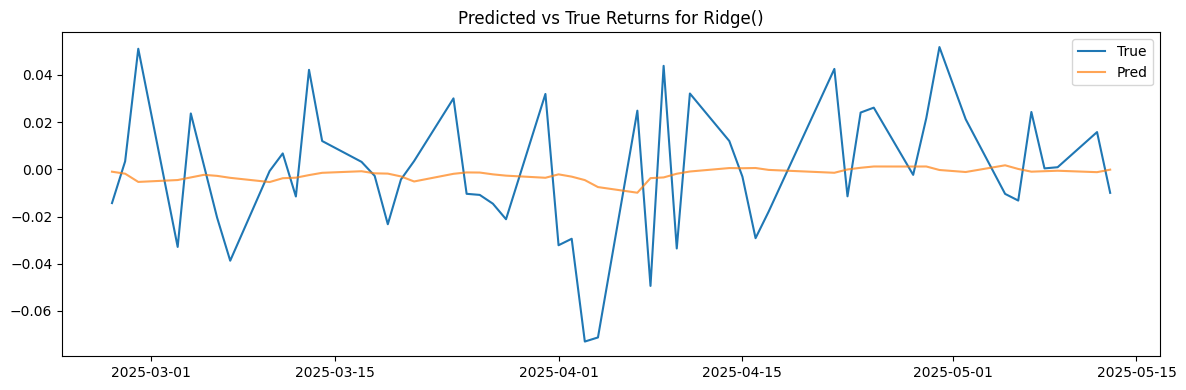

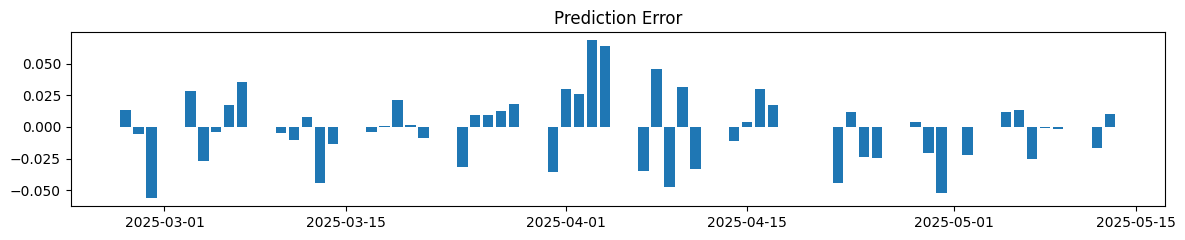

In [4]:
model, X_test, Y_test = train_linear_model(df)
evaluate_model(model, X_test, Y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 4
[LightGBM] [Info] Start training from score 0.000176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

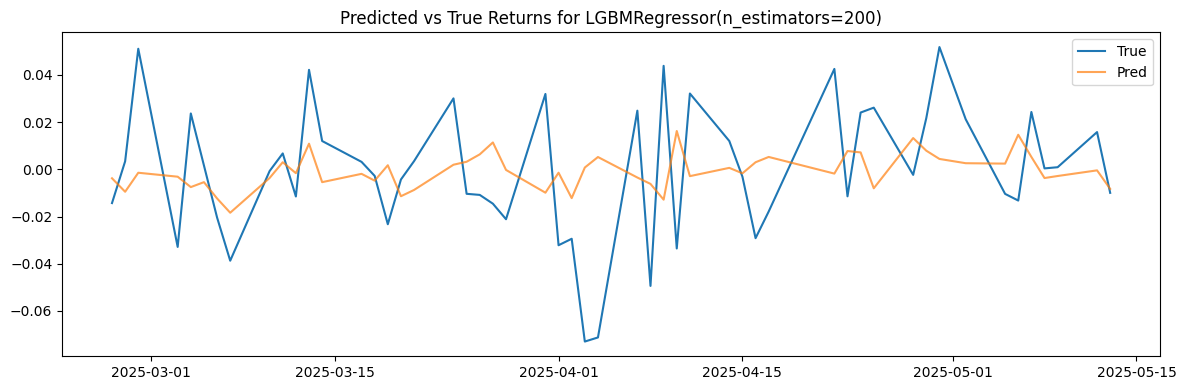

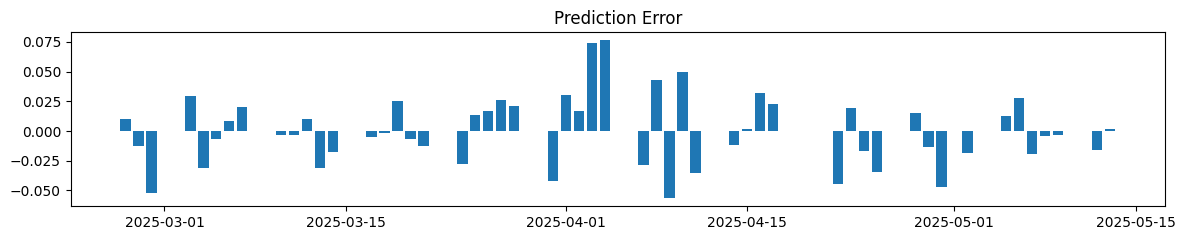

In [5]:
model, X_test, Y_test = train_lgbm_model(df)
evaluate_model(model, X_test, Y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 4
[LightGBM] [Info] Start training from score 0.000176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

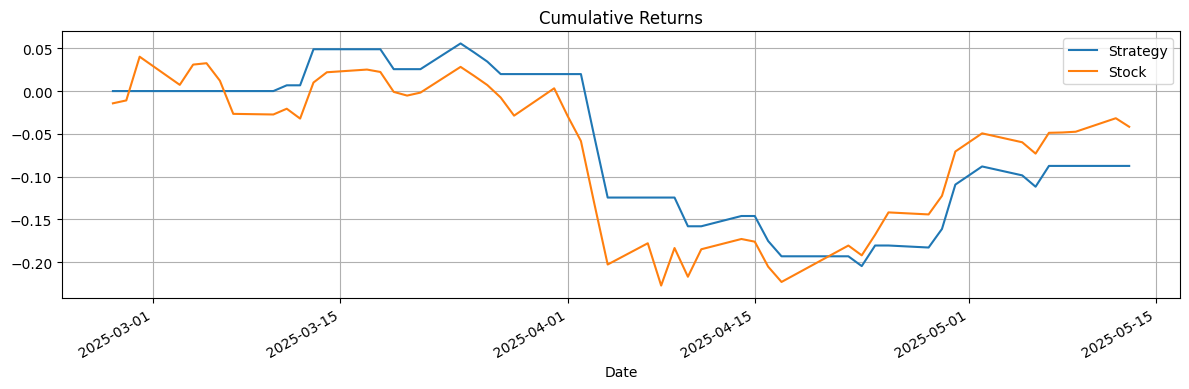

Strategy Return: -8.74 %
Stock Return: -4.17 %


In [6]:
model, X_test, y_test = train_lgbm_model(df)
pnl_series = backtest_strategy(model, X_test, y_test)
compare_strategy_vs_stock( pnl_series, y_test)


# Result on stock basket

In [3]:
TICKERS = [
    "AIR.PA",    # Airbus
    "SAF.PA",    # Safran
    "HO.PA",     # Thales
    "MTX.DE",    # MTU Aero Engines
    "LDO.MI",    # Leonardo
    "RR.L",      # Rolls-Royce
    "BA.L",     # BAE Systems
    "BA",        # Boeing
    "RTX",       # RTX Corporation
    "LMT",       # Lockheed Martin
    "NOC",       # Northrop Grumman
    "GD",        # General Dynamics
    "TXT",       # Textron
    "HWM",       # Howmet Aerospace
    "SPR",       # Spirit AeroSystems
    "HEI",       # HEICO Corp
    "TDG",       # TransDigm Group
    "BBD-B.TO",  # Bombardier
    "CAE.TO",    # CAE Inc.
    "ERJ",       # Embraer
    "AVAV",      # AeroVironment
]
strategy_returns, benchmark_return, model = strategy_return(TICKERS, '2024-01-01', '2025-05-01')
compare_portfolio_vs_benchmark(strategy_returns, benchmark_return, model)

TypeError: strategy_return() missing 2 required positional arguments: 'signal_bull' and 'signal_bear'

YF.download() has changed argument auto_adjust default to True
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 267, number of used features: 4
[LightGBM] [Info] Start training from score 0.000610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

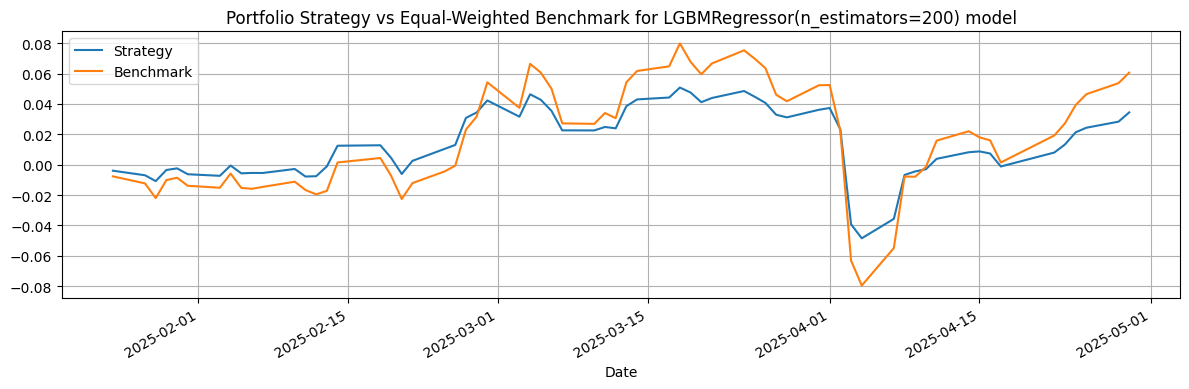

Strategy Return: 3.44 %
Benchmark Return: 6.06 %


In [4]:
strategy_returns, benchmark_return, model = strategy_return_lgbm(TICKERS, '2024-01-01', '2025-05-01', 1, 0)
compare_portfolio_vs_benchmark(strategy_returns, benchmark_return, model)